## Análise de gastos por Região/Localidade | Guardians

**🔹 Objetivo principal**

1. Entender a distribuição das dotação em diferentes localizadores e regiões.

**🔹 Objetivos específicos**
1. Identificar os localizadores com as maiores e menores Dotação Atuais.

2. Identificar as regiões com as maiores e menores Dotação Atuais.

3. Verificar se existem localizadores ou regiões que precisam de uma revisão orçamentária com base nas diferenças entre a Dotacao Inicial e a Dotacao Atual.

In [ ]:
# importação das bibliotecas para análise em python.

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# importação dos dados do orçamento da UFCG por meio do github.

df = pd.read_csv("https://raw.githubusercontent.com/Guardians-DSC/dados/main/orcamento/consulta_siop_orcamento_ufcg.csv")

## 1° etapa
Tratar o dataframe.


In [ ]:
# todas as colunas existentes no dataframe.

df.columns

Index(['ano', 'orgao_orcamentario', 'funcao', 'unidade_orcamentaria',
       'programa', 'acao', 'localizador', 'regiao', 'uf', 'municipio',
       'plano_orcamentario', 'grupo_de_despesa', 'modalidade_de_aplicacao',
       'natureza_de_despesa', 'resultado_primario', 'fonte', 'subfuncao',
       'origem_do_credito', 'objetivo', 'projeto_de_lei', 'dotacao_inicial',
       'dotacao_atual', 'empenhado', 'liquidado', 'pago'],
      dtype='object')

In [ ]:
# simplificação da tabela, nesta etapa apenas 8 colunas serão consideradas para atingir os objetivos.

colunas_informacoes = ['ano', 'localizador', 'regiao', 'fonte', 'projeto_de_lei', 'dotacao_inicial', 'dotacao_atual', 'pago']
dados_regioes = df[colunas_informacoes].dropna()

dados_regioes.columns = ['Ano', 'Localizador', 'Região', 'Fonte', 'Projeto de Lei', 'Dotacao Inicial', 'Dotacao Atual', 'Pago']

In [ ]:
# vericando os tipos referentes a cada coluna.

dados_regioes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano              4963 non-null   int64 
 1   Localizador      4963 non-null   object
 2   Região           4963 non-null   object
 3   Fonte            4963 non-null   object
 4   Projeto de Lei   4963 non-null   object
 5   Dotacao Inicial  4963 non-null   object
 6   Dotacao Atual    4963 non-null   object
 7   Pago             4963 non-null   object
dtypes: int64(1), object(7)
memory usage: 310.3+ KB


In [ ]:
# ajustando os tipos das colunas numericas.

dados_regioes["Pago"] = dados_regioes["Pago"].str.replace(".", "")
dados_regioes["Pago"] = pd.to_numeric(dados_regioes["Pago"])

<ipython-input-132-e4ab9a3756ee>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_regioes["Pago"] = dados_regioes["Pago"].str.replace(".", "")


In [ ]:
# ajustando os tipos das colunas numericas.

dados_regioes["Dotacao Inicial"] = dados_regioes["Dotacao Inicial"].str.replace(".", "")
dados_regioes["Dotacao Inicial"] = pd.to_numeric(dados_regioes["Dotacao Inicial"])

<ipython-input-133-4829165394bd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_regioes["Dotacao Inicial"] = dados_regioes["Dotacao Inicial"].str.replace(".", "")


In [ ]:
# ajustando os tipos das colunas numericas.

dados_regioes["Dotacao Atual"] = dados_regioes["Dotacao Atual"].str.replace(".", "")
dados_regioes["Dotacao Atual"] = pd.to_numeric(dados_regioes["Dotacao Atual"])

dados_regioes.head()


<ipython-input-134-638b99671d07>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_regioes["Dotacao Atual"] = dados_regioes["Dotacao Atual"].str.replace(".", "")


,Ano,Localizador,Região,Fonte,Projeto de Lei,Dotacao Inicial,Dotacao Atual,Pago
0,2012,0025 - No Estado da Paraíba,NE - Região Nordeste,100 - Recursos Primários de Livre Aplicação,0,7686431,14586431,0
1,2012,0025 - No Estado da Paraíba,NE - Região Nordeste,156 - Contribuição do Servidor para o Plano de...,0,22956997,22956997,0
2,2012,0025 - No Estado da Paraíba,NE - Região Nordeste,169 - Contribuição Patronal para o Plano de Se...,0,38666570,38666570,0
3,2012,0025 - No Estado da Paraíba,NE - Região Nordeste,156 - Contribuição do Servidor para o Plano de...,21.584.508,0,0,0
4,2012,0025 - No Estado da Paraíba,NE - Região Nordeste,169 - Contribuição Patronal para o Plano de Se...,38.666.570,0,0,0


## 2° etapa
Análise dos valores unicos de Região e Localizador


In [ ]:
# vericando os valores unicos da coluna Região.

dados_regioes["Região"].unique()

array(['NE - Região Nordeste', 'NA - Nacional', 'EX - Exterior'],
      dtype=object)

In [ ]:
# vericando os valores unicos da coluna Localizador.

dados_regioes["Localizador"].unique()

array(['0025 - No Estado da Paraíba',
       '0101 - Nacional (Crédito Extraordinário)',
       '0168 - Campus Cajazeiras - Cajazeiras - PB',
       '0170 - Campina Grande - PB',
       '0110 - Campus de Patos - No Estado da Paraíba',
       '0138 - Equipamentos para o Centro de Humanidades da UFCG - Campina Grande - PB',
       '0174 - Aquisição de Estantes/Arquivos deslizantes para o Centro de Humanidades - Campina Grande - PB',
       '0176 - Ampliação e Consolidação da UFCG - Campina Grande - PB',
       '0001 - Nacional', '7004 - Campus Sumé - No Estado da Paraíba',
       '7022 - Campus Cajazeiras - No Estado da Paraíba',
       '1392 - No Município de Campina Grande - PB',
       '1551 - No Município de Sousa - PB',
       '7004 - Campus Patos - No Estado da Paraíba',
       '7000 - Hospital Universitário Júlio Bandeira de Melo - HUJB - UFCG/Campus Cajazeiras - No Estado da Paraíba',
       '7010 - Hospital Universitário Júlio Maria Bandeira de Mello - No Município de Cajazeiras

## 3° etapa


Identificar os localizadores com as maiores e menores dotações atuais:


In [ ]:
# Localizador com a maior dotacao atual

localizador_maior_dotacao = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmax()]['Localizador']
localizador_maior_dotacao_valor = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmax()]['Dotacao Atual']

# Localizador com a menor dotacao atual
localizador_menor_dotacao = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmin()]['Localizador']
localizador_menor_dotacao_valor = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmin()]['Dotacao Atual']

print(f"Localizador com a maior dotacao atual: {localizador_maior_dotacao}. Valor: {localizador_maior_dotacao_valor}")
print(f"Localizador com a menor dotacao atual: {localizador_menor_dotacao}. Valor: {localizador_menor_dotacao_valor}")


Localizador com a maior dotacao atual: 0025 - No Estado da Paraíba. Valor: 389668265
Localizador com a menor dotacao atual: 0025 - No Estado da Paraíba. Valor: 0


In [ ]:
# Ordenanar pela coluna Dotação Atual

df_ordenado = dados_regioes.sort_values(by='Dotacao Atual', ascending=False)
df_ordenado = df_ordenado.reset_index(drop=True)

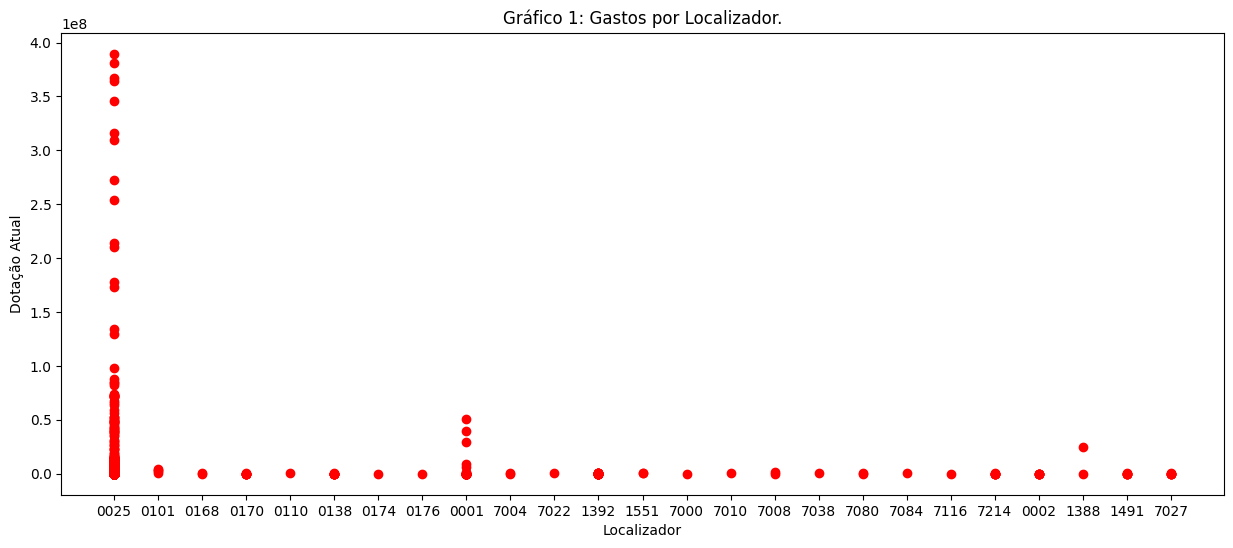

In [ ]:
# criação do gráfico dos resultados.

dados_regioes["Codigo"] = dados_regioes['Localizador'].str.extract(r'(\d+)')
plt.figure(figsize=(15, 6))
plt.scatter(dados_regioes['Codigo'], dados_regioes['Dotacao Atual'], c='red')
plt.xlabel('Localizador')
plt.ylabel('Dotação Atual')
plt.title('Gráfico 1: Gastos por Localizador.')
plt.show()


### Resultado Atingido

🔹 Depois da filtração de dados, foi possível obter os valores dos localizadores que possuem maior e menor valor.

🔹 Tendo em mente que há diversas linhas com dotação 0 a menor dotação pode variar entre os Localizadores.

🔹 Foi notado uma incidência desproporcional de um localizador em relação aos demais.

### dados obtidos:


> **Localizador com maior dotação:** EX - Exterior.

> **Localizador com maior dotação valor:** 389.668.265.

> **Localizador com menor dotação:** EX - Exterior.

> **Localizador com menor dotação valor:** 0.


## 4° etapa


Identificar as regiões com as maiores e menores dotação atuais:

In [ ]:
# Região com a maior dotacao atual
regiao_maior_dotacao = dados_regioes.loc[dados_regioes.groupby('Região')['Dotacao Atual'].idxmax()]['Região']
regiao_maior_dotacao_valor = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmax()]['Dotacao Atual']

# Região com a menor dotacao atual
regiao_menor_dotacao = dados_regioes.loc[dados_regioes.groupby('Região')['Dotacao Atual'].idxmin()]['Região']
regiao_menor_dotacao_valor = dados_regioes.loc[dados_regioes['Dotacao Atual'].idxmin()]['Dotacao Atual']


print(f"Região com a maior dotacao atual: {regiao_maior_dotacao.values[0]}. Valor: {regiao_maior_dotacao_valor}")
print(f"Região com a menor dotacao atual: {regiao_menor_dotacao.values[0]}. Valor: {regiao_menor_dotacao_valor}")


Região com a maior dotacao atual: EX - Exterior. Valor: 389668265
Região com a menor dotacao atual: EX - Exterior. Valor: 0


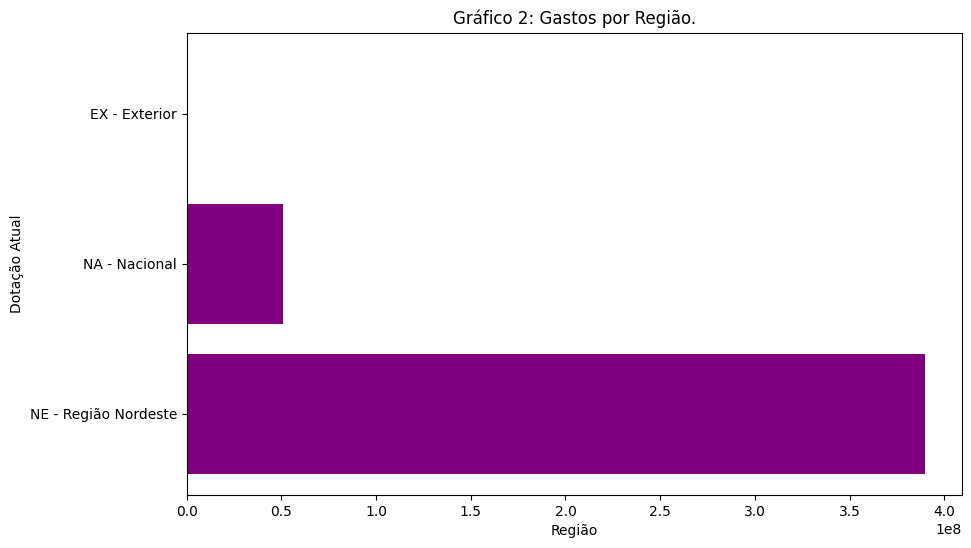

In [ ]:
# criação do gráfico dos resultados.

dados_regioes["Codigo"] = dados_regioes['Região']
plt.figure(figsize=(10, 6))
plt.barh(dados_regioes['Codigo'], dados_regioes['Dotacao Atual'], color='purple')
plt.xlabel('Região')
plt.ylabel('Dotação Atual')
plt.title('Gráfico 2: Gastos por Região.')
plt.show()


### Resultado Atingido

🔹 Depois da filtração de dados, foi possível obter os valores das regiões que possuem maior e menor valor.

🔹 Tendo em mente que há diversas linhas com dotação 0 a menor dotação pode variar entre as regiões.

🔹 Foi notado uma incidência desproporcional de um região em relação aos demais.

### dados obtidos:


> **Região com maior dotação:** EX - Exterior.

> **Região com maior dotação valor:** 389.668.265.

> **Região com menor dotação:** EX - Exterior.

> **Região com menor dotação valor:** 0.


## 5° etapa

Verificar se existem localizadores ou regiões que precisam de uma revisão orçamentária com base nas diferenças entre a dotacão_inicial e a dotacão_atua

In [ ]:
# Calcular a diferença entre a dotacão_inicial e a dotacão_atual além de indentificar as diferenças orçamentárias por localizade e região
dados_regioes['diferenca_orcamentaria'] = dados_regioes['Dotacao Atual'] - dados_regioes['Dotacao Inicial']

localizadores_revisao_negativa = dados_regioes.loc[dados_regioes['diferenca_orcamentaria'] < 0]['Localizador'].unique()

regioes_revisao_negativa = dados_regioes.loc[dados_regioes['diferenca_orcamentaria'] < 0]['Região'].unique()

print("Localizadores que podem precisar de revisão orçamentária (diferença negativa):")
print(localizadores_revisao_negativa)

print("\nRegiões que podem precisar de revisão orçamentária (diferença negativa):")
print(regioes_revisao_negativa)


Localizadores que podem precisar de revisão orçamentária (diferença negativa):
['0025 - No Estado da Paraíba' '0001 - Nacional'
 '1392 - No Município de Campina Grande - PB']

Regiões que podem precisar de revisão orçamentária (diferença negativa):
['NE - Região Nordeste' 'NA - Nacional']


### Resultado Atingido

🔹 Foi notado casos onde há uma diferença negativa da subtração da Dotação Atual - Dotação Inicial.

### dados obtidos:


> **Localizadores que podem precisar de revisão:** 0025 - No Estado da Paraíba,
0001 - Nacional,
1392 - No Município de Campina Grande - PB


> **Regiões que podem precisar de revisão:** NE - Região Nordeste, NA - Nacional.


## Objetivo atingido:
Com os dados gerados pelos gráfico 1 e 2, podemos perceber que na distribuição dos dados um grande número de Localizadores se concentra no 0025 - No Estado da Paraíba, e quando se trata das Regiões há uma concentração na NE -Região Nordeste.

## Conclusão:
Com esta finalização, podemos observar que a análise dos dados revelou que a distribuição de recursos financeiros entre localizadores e regiões não é uniforme. O Localizador "EX - Exterior" se destacou tanto com as maiores quanto as menores dotações, apontando para uma variação significativa nos registros.

Também identificamos casos de diferenças orçamentárias negativas em localizadores e regiões, sugerindo a necessidade de revisão e ajustes. Além disso, notamos uma concentração de dados em "0025 - No Estado da Paraíba" e "NE - Região Nordeste," indicando sua relevância no contexto orçamentário.

Resumidamente, esta análise oferece informações essenciais para uma distribuição mais equitativa de recursos públicos, destacando áreas que requerem uma atenção cuidadosa para garantir um uso eficaz e justo dos recursos.